In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 28.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=682152c8f59d59d98690e5ee1791517968482c82d9ae4d4e1d5d5b2cf321b570
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [6]:
data = []
conversation = '/content/drive/MyDrive/Datasets/WhatsApp Chat with Satabdi Nitr.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [10]:

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date     Time         Author  \
11162 2022-07-14  6:09 PM  Sanjeet Patro   
11163 2022-07-14  6:09 PM  Sanjeet Patro   
11164 2022-07-14  6:10 PM  Sanjeet Patro   
11165 2022-07-14  6:12 PM   Satabdi Nitr   
11166 2022-07-14  6:12 PM   Satabdi Nitr   
11167 2022-07-14  6:24 PM  Sanjeet Patro   
11168 2022-07-14  6:24 PM  Sanjeet Patro   
11169 2022-07-14  6:25 PM   Satabdi Nitr   
11170 2022-07-14  6:25 PM   Satabdi Nitr   
11171 2022-07-14  6:26 PM  Sanjeet Patro   
11172 2022-07-14  6:26 PM   Satabdi Nitr   
11173 2022-07-14  6:26 PM  Sanjeet Patro   
11174 2022-07-14  6:26 PM   Satabdi Nitr   
11175 2022-07-14  6:26 PM   Satabdi Nitr   
11176 2022-07-14  6:26 PM  Sanjeet Patro   
11177 2022-07-14  6:27 PM  Sanjeet Patro   
11178 2022-07-14  6:27 PM  Sanjeet Patro   
11179 2022-07-14  6:28 PM   Satabdi Nitr   
11180 2022-07-14  6:29 PM  Sanjeet Patro   
11181 2022-07-14  6:29 PM  Sanjeet Patro   

                                        Message  
11162                    

In [11]:
total_messages = df.shape[0]
print(total_messages)

11182


In [12]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

1123


In [14]:

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if word in emoji.UNICODE_EMOJI:
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [16]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Sanjeet and Satabdi")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Sanjeet and Satabdi
Total Messages:  11182
Number of Media Shared:  1123
Number of Emojis Shared 0
Number of Links Shared 52


In [18]:

media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Sanjeet Patro", "Satabdi Nitr"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Sanjeet Patro -
Messages Sent 5158
Average Words per message 3.648894920511826
Media Messages Sent 502
Emojis Sent 0
Links Sent 5
Stats of Satabdi Nitr -
Messages Sent 4823
Average Words per message 3.5876010781671157
Media Messages Sent 621
Emojis Sent 0
Links Sent 11


There are 190456 words in all the messages.


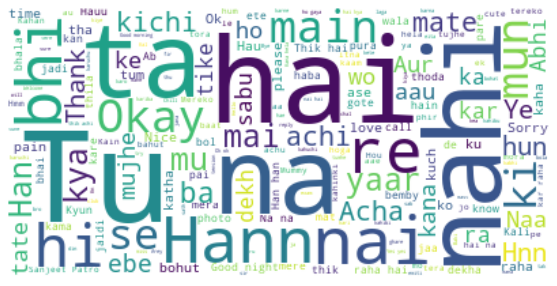

In [20]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Sanjeet Patro


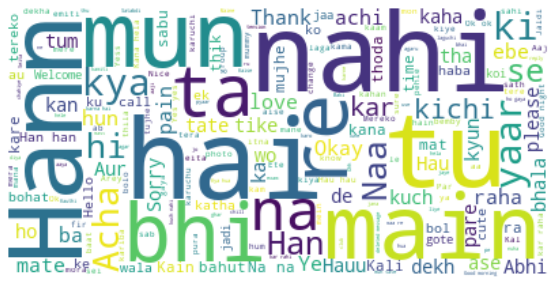

Author name Satabdi Nitr


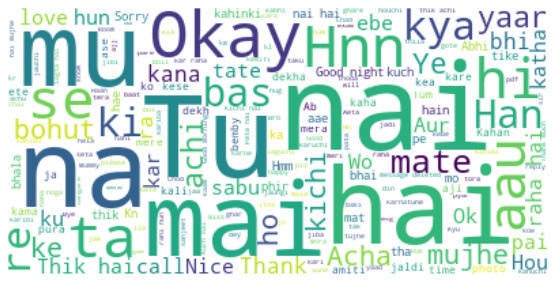

In [21]:
l = ["Sanjeet Patro", "Satabdi Nitr"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()